In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Importing the warnings 
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
os.getcwd()

os.chdir(r"/Users/aakashverma/Desktop")
os.getcwd()

'/Users/aakashverma/Desktop'

In [3]:
# Loading the train and test data

Train_data = pd.read_excel('Data_Train.xlsx')
Test_data = pd.read_excel("Test_set.xlsx")

In [4]:
Train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
Test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
print("Train_data :", Train_data.shape)
print("\n")
print("Test_data :", Test_data.shape)

Train_data : (10683, 11)


Test_data : (2671, 10)


Now from here we 1st analyse the train data set and the same is applied for the test data set. 
If we concat the test and and train data set , there is a problem of data leakage. 
So we are analysing both the dataset separetely. 

## Train Data 

In [7]:
Train_data.shape

(10683, 11)

In [8]:
Train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [9]:
Train_data.isnull().values.any()

True

In [10]:
Train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

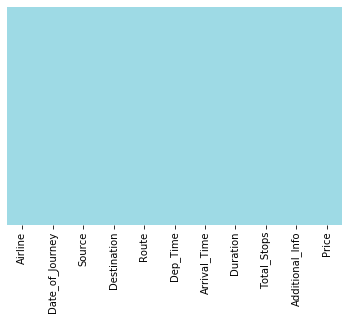

In [11]:
# Checking via visualization
sns.heatmap(Train_data.isnull(),yticklabels = False, cbar = False, cmap = "tab20_r")

Only one value is null in route column and total_stops column. so instead of filling them we can drop it.

In [12]:
#Dropping the null values
Train_data.dropna(inplace = True)

In [13]:
#checking the null values in column
Train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [14]:
Train_data.shape

(10682, 11)

In [15]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10682 non-null object
Date_of_Journey    10682 non-null object
Source             10682 non-null object
Destination        10682 non-null object
Route              10682 non-null object
Dep_Time           10682 non-null object
Arrival_Time       10682 non-null object
Duration           10682 non-null object
Total_Stops        10682 non-null object
Additional_Info    10682 non-null object
Price              10682 non-null int64
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


Observations:-

- All the columns are the object data type except price column which is int data type and our dependent variable.

- Before going further we have to change the data type of columns which have the object datatype and also we have to change the value inside these columns because our model does not understand the string values 

## Summary Statistics

In [16]:
Train_data.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


Observation:-
    
- Minimum price of the flight is 1759 and the maximum is 79512.


- Mean is greater than median thats why Price column is right skewed

## Exploratory Data Analysis

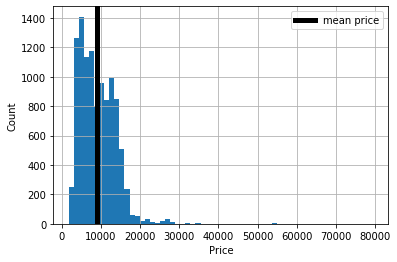

In [17]:
# checking the mean price

price = Train_data["Price"].hist(bins=60)
mean_val = np.mean(Train_data["Price"])
plt.axvline(mean_val, linewidth=5, color="Black", label="mean price")
plt.xlabel("Price")
plt.ylabel("Count")
plt.legend()
plt.show()

From this plot we can see that , Date of Journey is a object data type, therefore we have to convert the data type into timestamp so that we can use this column for better prediction

In [18]:
Train_data["Date_of_Journey"].unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

Here from date of journey all the data from the year 2019 so we cannot create separate column for an year 

In [19]:
# For Journey Date column 
#fething date
Train_data["Journey_date"] = pd.to_datetime(Train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.day

In [20]:
# fething month
Train_data["Journey_month"] = pd.to_datetime(Train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [21]:
Train_data= Train_data.drop(["Date_of_Journey"],axis = 1)

In [22]:
Train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [23]:
# For Departure timing column

# fetching hours 

Train_data["Dep_hour"] = pd.to_datetime(Train_data["Dep_Time"]).dt.hour

In [24]:
# fethching minute
Train_data["Dep_min"] = pd.to_datetime(Train_data["Dep_Time"]).dt.minute

In [25]:
Train_data= Train_data.drop(["Dep_Time"],axis = 1)

In [26]:
Train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [27]:
# For DArrival timing column
# fetching hours 

Train_data["Arrival_hour"] = pd.to_datetime(Train_data["Arrival_Time"]).dt.hour

In [28]:
# fething minutes
Train_data["Arrival_min"] = pd.to_datetime(Train_data["Arrival_Time"]).dt.minute

In [29]:
Train_data= Train_data.drop(["Arrival_Time"],axis = 1)

In [30]:
Train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [31]:
# # For Duration column 
# # Differnce between departure time and arrival time 

# duration = list(Train_data["Duration"])

# for i in range(len(duration)):
#     if len(duration[i].split()) != 2:  # check if duration contains only hour or mins
#         if "h" in duration[i]:
#             duration[i] = duration[i].strip() + "0m" # Adds o mins
#         else:
#             duration[i] = "0h" + duration[i] # Adds 0 hour
            
# duration_hours = []
# duration_mins = []

# for i in range(len(duration)):
#     duration_hours.append(int(duration[i].split(sep = "h")[0]))                # Extract hours from duration
#     duration_mins.append(duration[i].split(sep = "m")[0].split()[-1])    # Extract mins from duration

In [32]:
# Train_data["Duration_hours"] = duration_hours
# Train_data["Duration_mins"] = duration_mins

In [33]:
s=pd.to_timedelta(Train_data['Duration'])
Train_data["Duration_hours"]=s.dt.components['hours']
Train_data["Duration_mins"]=s.dt.components['minutes']

In [34]:
Train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [35]:
Train_data= Train_data.drop(["Duration"],axis = 1)

In [36]:
Train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


## Airline Vs Price

In [37]:
print(Train_data["Airline"].value_counts())

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


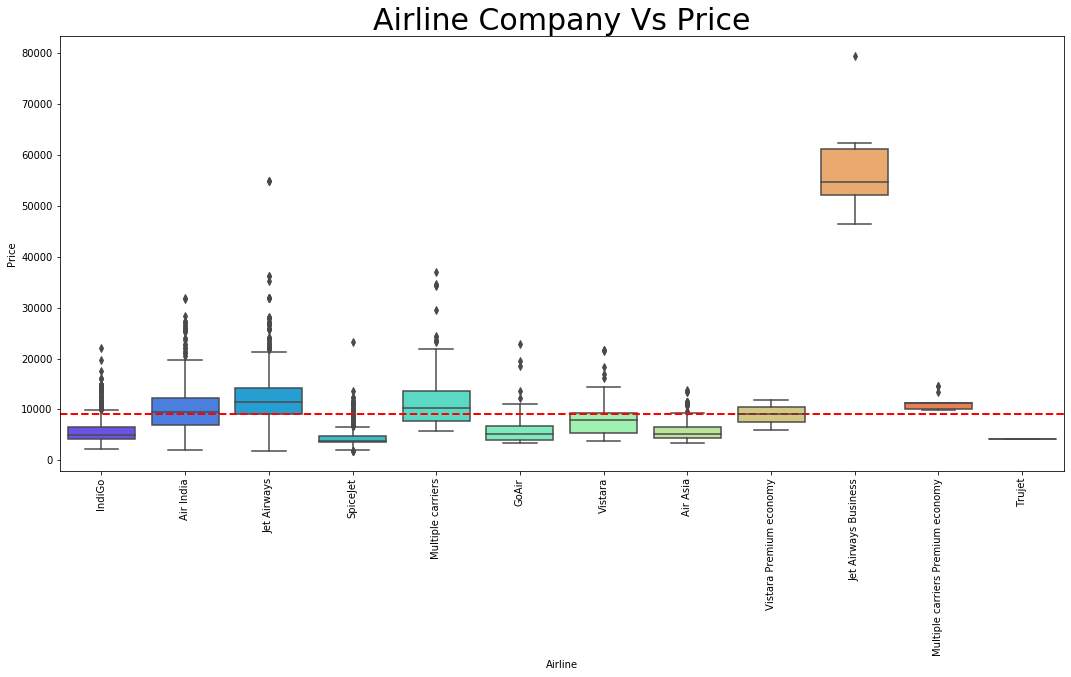

In [38]:
#Airline vs Price
plt.figure(figsize=(18,8))
mean_price = np.mean(Train_data["Price"])
sns.boxplot(y = "Price", x="Airline", data=Train_data, palette ="rainbow")
plt.axhline(mean_price, color = "r", linestyle="dashed", linewidth = 2)
plt.title("Airline Company Vs Price", fontsize = 30)
plt.xticks(rotation = "vertical")
plt.show()

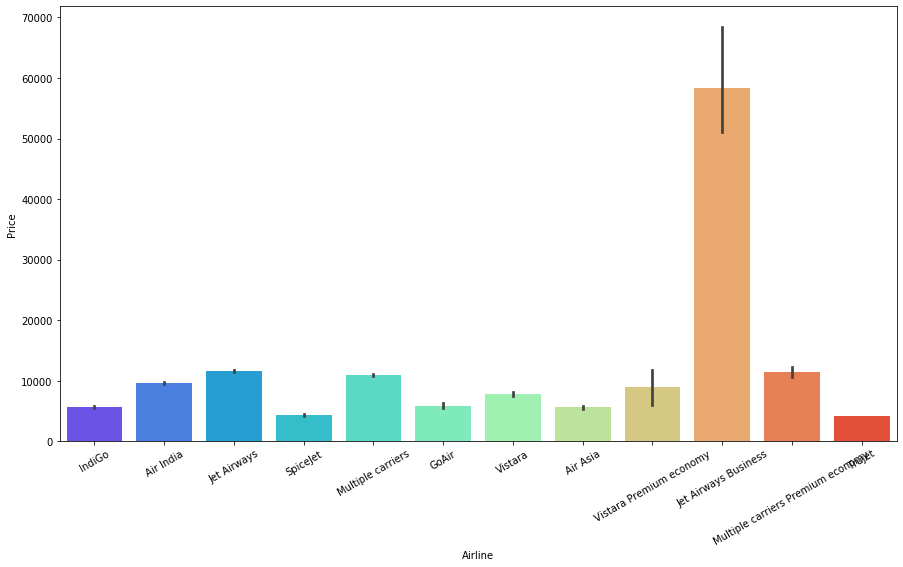

In [39]:
plt.figure(figsize=(15,8))
sns.barplot(x="Airline", y="Price", data=Train_data, palette="rainbow")
plt.xticks(rotation = 30)
plt.show()

Observation :-

. From above graph we can see that Jet Airways Businesss have the highest price. We can also remove it as Jet Airways is closed.


.There are also some outliers present in Airways price which needs to be removed 

## Source Destination Vs Price 

In [40]:
print(Train_data["Source"].value_counts())

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


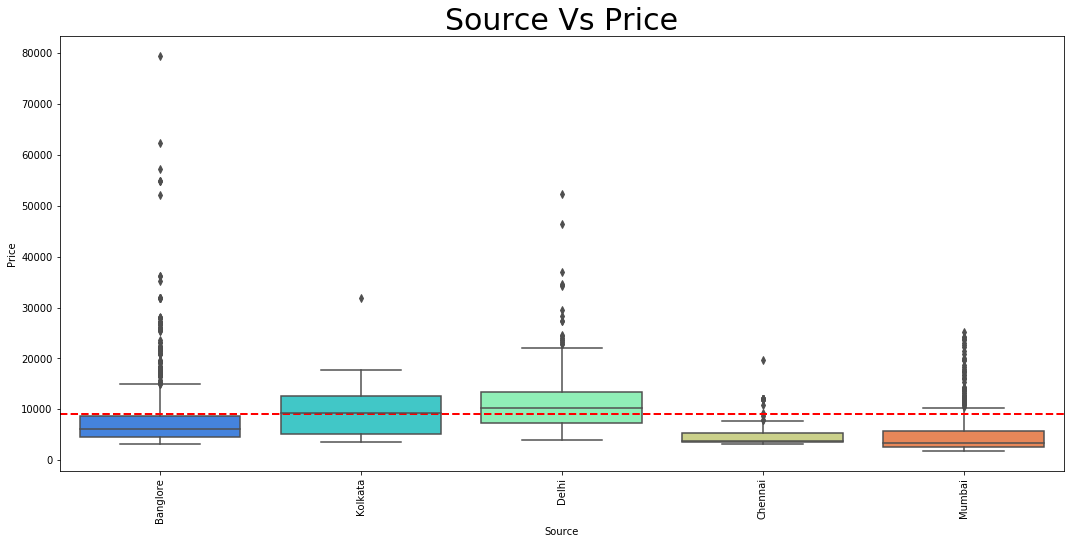

In [41]:
#Airline vs Price
plt.figure(figsize=(18,8))
mean_price = np.mean(Train_data["Price"])
sns.boxplot(y = "Price", x="Source", data=Train_data, palette ="rainbow")
plt.axhline(mean_price, color = "r", linestyle="dashed", linewidth = 2)
plt.title("Source Vs Price", fontsize = 30)
plt.xticks(rotation = "vertical")
plt.show()

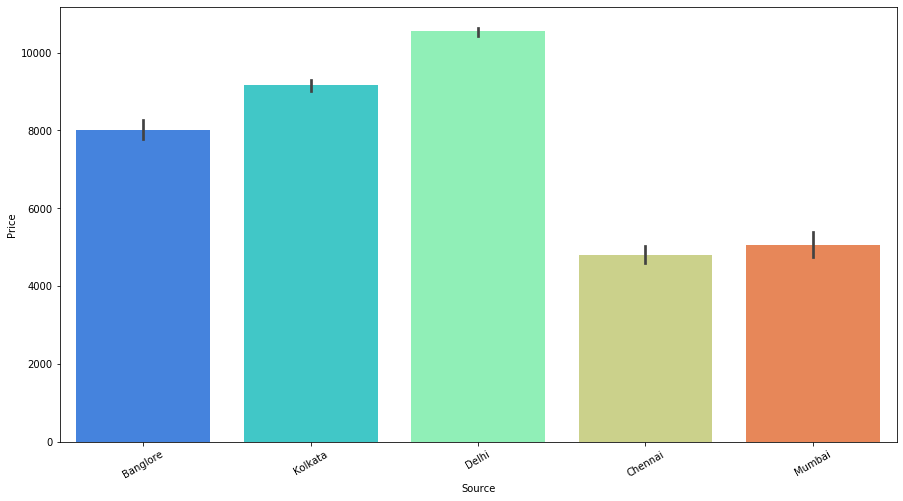

In [42]:
plt.figure(figsize=(15,8))
sns.barplot(x="Source", y="Price", data=Train_data, palette="rainbow")
plt.xticks(rotation = 30)
plt.show()

Observations :-


From Delhi price of the flight is very high .


But from basnglore some tickets price is too high which can be the outliers.



## Destination Airport Vs Price

In [43]:
print(Train_data["Destination"].value_counts())

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


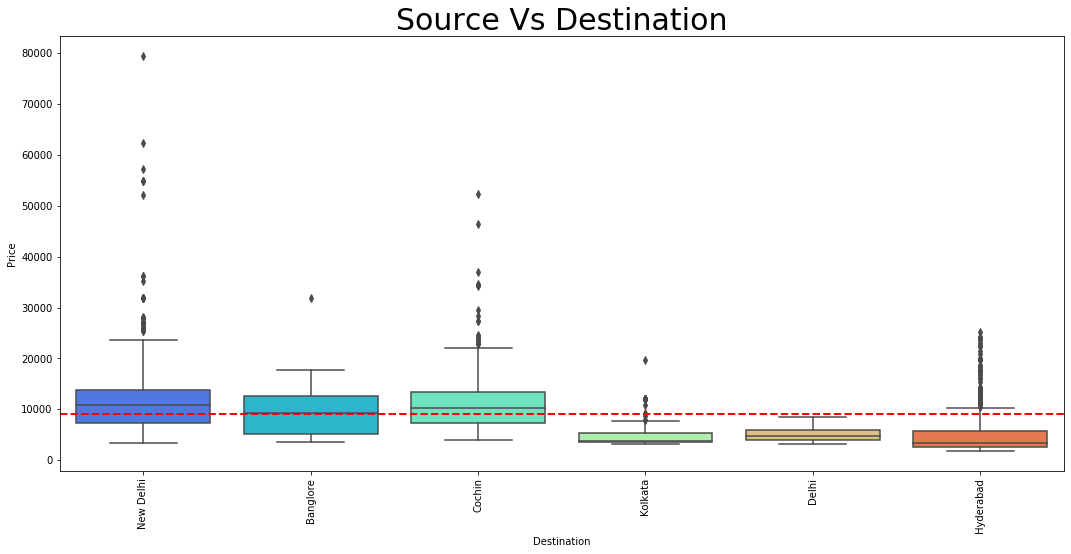

In [44]:
#Airline vs Price
plt.figure(figsize=(18,8))
mean_price = np.mean(Train_data["Price"])
sns.boxplot(y = "Price", x="Destination", data=Train_data, palette ="rainbow")
plt.axhline(mean_price, color = "r", linestyle="dashed", linewidth = 2)
plt.title("Source Vs Destination", fontsize = 30)
plt.xticks(rotation = "vertical")
plt.show()

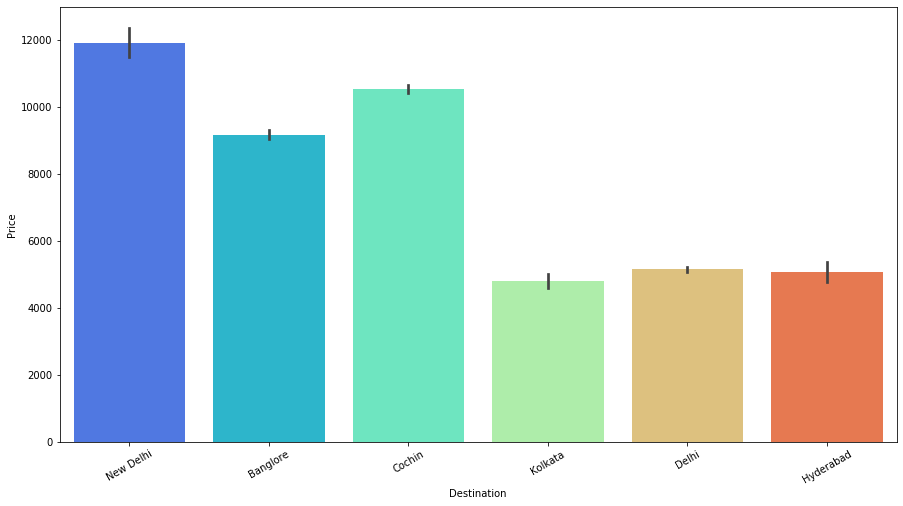

In [45]:
plt.figure(figsize=(15,8))
sns.barplot(x="Destination", y="Price", data=Train_data, palette="rainbow")
plt.xticks(rotation = 30)
plt.show()

Observations :-

Maximum fare is for New delhi.



## Total Stops Vs Price 

In [46]:
Train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

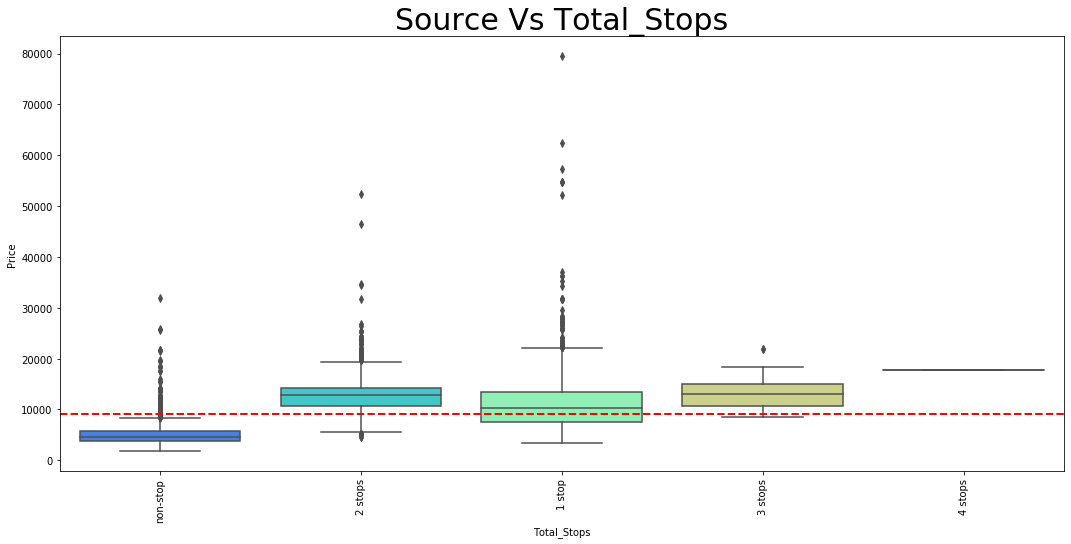

In [47]:
#Airline vs Price
plt.figure(figsize=(18,8))
mean_price = np.mean(Train_data["Price"])
sns.boxplot(y = "Price", x="Total_Stops", data=Train_data, palette ="rainbow")
plt.axhline(mean_price, color = "r", linestyle="dashed", linewidth = 2)
plt.title("Source Vs Total_Stops", fontsize = 30)
plt.xticks(rotation = "vertical")
plt.show()

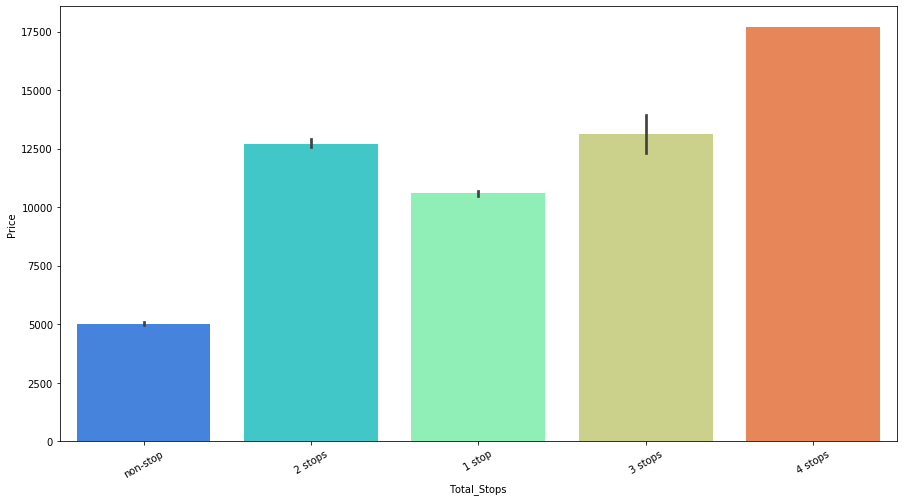

In [48]:
plt.figure(figsize=(15,8))
sns.barplot(x="Total_Stops", y="Price", data=Train_data, palette="rainbow")
plt.xticks(rotation = 30)
plt.show()

Observations :-

It is clearly seen that stops does not affect the price of the flight.

Flights which have 4c stops have higher price .

## Handling Categorical Columns

#### Using OnehotEncoding to covert the Airline,Source,Destination column because it is a nominal categorical data.  

In [49]:
#Converting the Airline column
Airline = Train_data["Airline"]
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [50]:
#Converting the Source column
Source = Train_data["Source"]
Source = pd.get_dummies(Source, drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [51]:
#Converting the Destination column
Destination = Train_data["Destination"]
Destination = pd.get_dummies(Source, drop_first=True)
Destination.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [52]:
Train_data.drop(["Route", "Additional_Info"], axis =1 , inplace=True)

In [53]:
Train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [54]:
# Now converting the Total_stops column
Train_data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)
Train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [55]:
# Now Concating the categorical columns with the Train_data set

train = pd.concat([Train_data,Airline,Source,Destination], axis=1)

In [56]:
train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,...,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Chennai,Delhi,Kolkata,Mumbai
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,0
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,0,1,0,0,0,1,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,0,1,0,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,0,1,0,0,0,1,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,0


In [57]:
train.drop(["Airline", "Source", "Destination"],axis = 1, inplace =True)

In [58]:
train.head()

,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Chennai,Delhi,Kolkata,Mumbai
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,0
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,0,1,0,0,0,1,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,0,1,0,0,0,1,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,0,1,0,0,0,1,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,0


In [59]:
train.shape

(10682, 29)

#### Now All the columns are changed into the numeric data type , now the same steps will be taking for test data.

# Test Data 

In [60]:
Test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [61]:
# #Pre-processing
# print(" Test data info")
# Test_data.info()
# print("*" * 85)

# print("\n")

# print("Null Values :")
# print("*" * 85)
# Test_data.dropna(inplace=True)
# print(Test_data.isnull().values.any())
# print("\n")
# print(Test_data.isnull().sum()

# # print("\n")


In [62]:
      
# #EDA

      
# Test_data["Journey_date"] = pd.to_datetime(Test_data["Date_of_Journey"], format= "%d/%m/%Y").dt.day
# Test_data["Journey_month"] = pd.to_datetime(Test_data["Date_of_Journey"], format="%d/%m/%Y").dt.month
# Test_data.drop(["Date_of_Journey"],axis = 1, inplace =True)
      
# Test_data["Dep_hour"] = pd.to_datetime(Test_data["Dep_Time"].dt.hour
# Test_data["Dep_min"] = pd.to_datetime(Test_data["Dep_Time"].dt.minute
# Test_data.drop(["Dep_Time"],axis = 1, inplace =True)
      
# Test_data["Arrival_hour"] = pd.to_datetime(Test_data["Arrival_Time"].dt.hour
# Test_data["Arrival_min"] = pd.to_datetime(Test_data["Arrival_Time"].dt.minute
# Test_data.drop(["Arrival_Time"],axis = 1, inplace =True)
      
# #duration
# # For Duration column 
# # Differnce between departure time and arrival time 

# duration = list(Test_data["Duration"])

# for i in range(len(duration)):
#     if len(duration[i].split()) != 2:  # check if duration contains only hour or mins
#         if "h" in duration[i]:
#             duration[i] = duration[i].strip() + "0m" # Adds o mins
#         else:
#             duration[i] = "0h" + duration[i] # Adds 0 hour
            
# duration_hours = []
# duration_mins = []

# for i in range(len(duration)):
#     duration_hours.append(int(duration[i].split(sep = "h")[0]))                # Extract hours from duration
#     duration_mins.append(duration[i].split(sep = "m")[0].split()[-1])
      
# Test_data["Duration_hours"] = duration_hours
# Test_data["Duration_mins"] = duration_mins
      
# Test_data= Train_data.drop(["Duration"],axis = 1)
      
# # categorical variables 
# print("Airline")
# print("*" * 85)
# print(Test_data["Airline"].value_counts())
# Airline = pd.get_dummies(Test_data["Airline"], drop_first = True)

# print()
      

# print("Source")
# print("*" * 85)
# print(Test_data["Source"].value_counts())
# Airline = pd.get_dummies(Test_data["Source"], drop_first = True)

# print()
      
            
# print("Destination")
# print("*" * 85)
# print(Test_data["Destination"].value_counts())
# Airline = pd.get_dummies(Test_data["Destination"], drop_first = True)

# print()
      
# Test_data.drop(["Route", "Additional_Info"], axis =1 , inplace=True)
      

# print("Total_Stops")
# print("*" * 85)
# print(Test_data["Total_Stops"].value_counts())
# Test_data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

# test = pd.concat([Test_data,Airline,Source,Destination], axis=1)
      
# test.drop(["Airline", "Source", "Destination"],axis = 1, inplace =True)
# test.head()

## Summary Statistics

In [63]:
Train_data.describe()

,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,0.824190,9087.214567,13.509081,4.708575,12.491013,24.409287,13.349186,24.690601,7.728515,28.326624
std,0.675229,4611.548810,8.479363,1.164408,5.748820,18.767801,6.859317,16.506808,6.419127,16.945817
min,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5277.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,1.000000,8372.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000,6.000000,30.000000
75%,1.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,12.000000,45.000000
max,4.000000,79512.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,23.000000,55.000000


Observations :-


Maximum number of stops is 4 for this dataset

Maximum price of thr flight is 79512 and minimum is 1759

Price is right skewed because mean is greater than mode

Difference between 75% and maximum is higher in Total_stops, Price, Arrival_min, Duration_hours . So outliers may be present in these columns

In [64]:
train_cor = Train_data.corr()
train_cor

,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
Total_Stops,1.000000,0.603897,-0.009451,0.054383,-0.061476,-0.002618,0.038140,-0.106940,0.594057,-0.136706
Price,0.603897,1.000000,-0.153774,-0.103643,0.006799,-0.024458,0.024244,-0.086155,0.452643,-0.124855
Journey_date,-0.009451,-0.153774,1.000000,-0.038359,0.002170,-0.008170,-0.003245,-0.017510,-0.013416,-0.008940
Journey_month,0.054383,-0.103643,-0.038359,1.000000,0.039127,-0.059267,-0.003927,-0.100626,0.046494,-0.040897
Dep_hour,-0.061476,0.006799,0.002170,0.039127,1.000000,-0.024745,0.005180,0.067911,0.011526,-0.023707
Dep_min,-0.002618,-0.024458,-0.008170,-0.059267,-0.024745,1.000000,0.043122,-0.017597,-0.025085,0.092485
Arrival_hour,0.038140,0.024244,-0.003245,-0.003927,0.005180,0.043122,1.000000,-0.154363,-0.012782,-0.118309
Arrival_min,-0.106940,-0.086155,-0.017510,-0.100626,0.067911,-0.017597,-0.154363,1.000000,-0.128140,0.151628
Duration_hours,0.594057,0.452643,-0.013416,0.046494,0.011526,-0.025085,-0.012782,-0.128140,1.000000,-0.149376
Duration_mins,-0.136706,-0.124855,-0.008940,-0.040897,-0.023707,0.092485,-0.118309,0.151628,-0.149376,1.000000


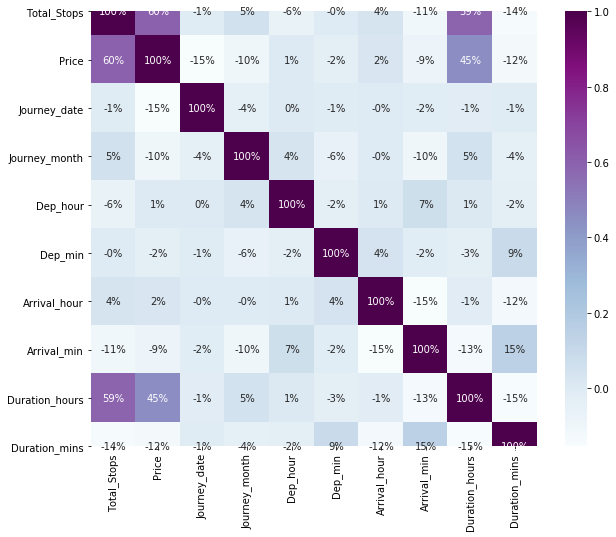

In [65]:
plt.figure(figsize=(10,8))
sns.heatmap(Train_data.corr(), annot=True, fmt ='.0%', cmap="BuPu")
plt.show()

Text(0.5, 1.0, 'Correlation with Target Variable ')

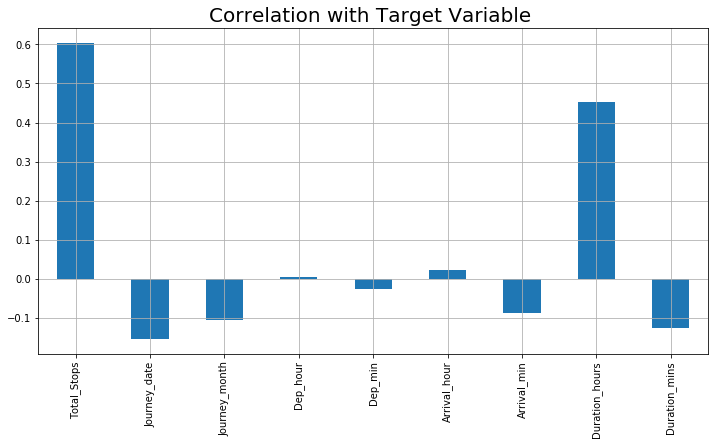

In [66]:
#Correlation with target column

plt.figure(figsize=(12,6))
Train_data.drop("Price", axis=1).corrwith(Train_data["Price"]).plot(kind = "bar", grid =True)
plt.xticks(rotation="vertical")
plt.title("Correlation with Target Variable ", fontsize = 20)

Observations :-

Total_Stops and Duration_hours are correlated with price.

## Removing Outliers

In [67]:
from scipy.stats import zscore
z = np.abs(zscore(train))
z

array([[1.22066609, 1.12553455, 1.23728754, ..., 0.85909313, 0.60626609,
        0.2642058 ],
       [1.74143186, 0.30906781, 1.47530729, ..., 0.85909313, 1.64944076,
        0.2642058 ],
       [1.74143186, 1.03978296, 0.53179604, ..., 1.16401816, 0.60626609,
        0.2642058 ],
       ...,
       [1.22066609, 0.40296691, 1.59110426, ..., 0.85909313, 0.60626609,
        0.2642058 ],
       [1.22066609, 0.77218138, 1.47530729, ..., 0.85909313, 0.60626609,
        0.2642058 ],
       [1.74143186, 0.57809433, 0.53179604, ..., 1.16401816, 0.60626609,
        0.2642058 ]])

In [68]:
threshold =3
print(np.where(z>3))

(array([    5,    12,    12, ..., 10674, 10676, 10680]), array([17, 21, 25, ..., 28, 17, 19]))


In [69]:
train_new = train[(z<3).all(axis=1)]

In [70]:
#Checking the shape
print(train.shape,"\t\t", train_new.shape)

(10682, 29) 		 (8281, 29)


In [71]:
train=train_new
train.shape

(8281, 29)

## Feature Selection

In [72]:
train.shape

(8281, 29)

In [73]:
train.columns

Index(['Total_Stops', 'Price', 'Journey_date', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Chennai', 'Delhi', 'Kolkata', 'Mumbai'],
      dtype='object')

In [76]:
x = train.drop(columns=["Price"], axis=1)
x.head()

,Total_Stops,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Chennai,Delhi,Kolkata,Mumbai
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,0,1,0,0,0,1,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,0,1,0,0,0,1,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,0,1,0,0,0,1,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
y = train["Price"]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [78]:
#Checking the shape
print(x.shape,"\t\t", y.shape)

(8281, 28) 		 (8281,)


In [79]:
# Scaling the input variables
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)


In [83]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [85]:
#Checking the shape
print(y_train.shape,"\t\t", y_test.shape)

(6624,) 		 (1657,)


In [87]:
# Importing the Models library

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#Importing Boosting Models

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Importing Error Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score




# All Algorithm by using for loop

model =[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(), Lasso(),Ridge() , ElasticNet(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor() ]


for m in model:
    m.fit(x_train,y_train)
    score = m.score(x_train,y_train)
    predm = m.predict(x_test)
    
    print("Score of",m,"is", score)
    print("MAE :", mean_absolute_error(y_test,predm))
    print("MSE :", mean_squared_error(y_test,predm))
    print("RMSE :", np.sqrt(mean_squared_error(y_test,predm)))
    print("R2_score :", r2_score(y_test,predm))
    print("************************************************************************")
    print("\n")




Score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is 0.54979211457786
MAE : 1939.4179735032315
MSE : 6254175.983586484
RMSE : 2500.8350572531735
R2_score : 0.5729347824182632
************************************************************************


Score of SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False) is 0.002198390724510224
MAE : 3285.970236211388
MSE : 14618611.201033216
RMSE : 3823.4292462439025
R2_score : 0.0017709143943960282
************************************************************************


Score of DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, ra

In [89]:
# Cross validate All the Algorithms using for loop
model =[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(), Lasso(),Ridge() , ElasticNet(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor() ]

for m in model:
    score=cross_val_score(m,x,y,cv=10,scoring="r2")
    print("Model :", m)
    print("Score :", score)
    print("Mean Score :", score.mean())
    print("Standard Deviation :", score.std())
    print("************************************************************************")
    print("\n")

Model : LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Score : [0.56153448 0.54481945 0.53309904 0.55266801 0.57094864 0.55627861
 0.52077963 0.54979267 0.5599859  0.56856836]
Mean Score : 0.5518474806111568
Standard Deviation : 0.014816048765425315
************************************************************************


Model : SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)
Score : [0.0839254  0.08213653 0.06919961 0.07179195 0.08702362 0.08137359
 0.08489473 0.08304902 0.07699106 0.07951085]
Mean Score : 0.07998963769139593
Standard Deviation : 0.00545672810554662
************************************************************************


Model : DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, mi

#### Random Forest regressor giving the best score and r2 score so I choose it as my final model

#### Using GridSearchCV to find the best parameters

In [90]:
from sklearn.model_selection import GridSearchCV

parameters = {"n_estimators":[400,500,600,700], "max_depth":[4,5,6,15,20]}
RFC = RandomForestRegressor()

clf = GridSearchCV(RFC,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'max_depth': 15, 'n_estimators': 600}


In [91]:
# Using Random forest Regressor with its Best Parameters.

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=400, min_samples_split=15, min_samples_leaf =1, max_features="auto",max_depth=20)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print("\n")

print("MAE :", mean_absolute_error(y_test,y_pred))
print("MSE :", mean_squared_error(y_test,y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test,y_pred)))
print("\n")
print("R2_score :", r2_score(y_test,y_pred))
print("************************************************************************")






MAE : 1220.693557790298
MSE : 2826696.204542148
RMSE : 1681.278146096638


R2_score : 0.806979587271224
************************************************************************


#### Now Our R2 score increases

##### Before Hypertuning : - 0.7474561056019758

##### After Hypertuning :-  0.806979587271224

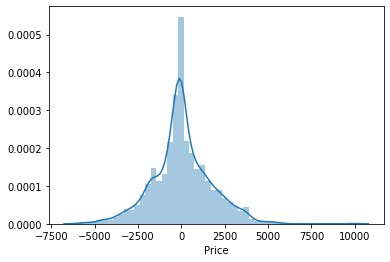

In [92]:
# plotting the distribution plot and we find the Gaussian plot

sns.distplot(y_test-y_pred)
plt.show()

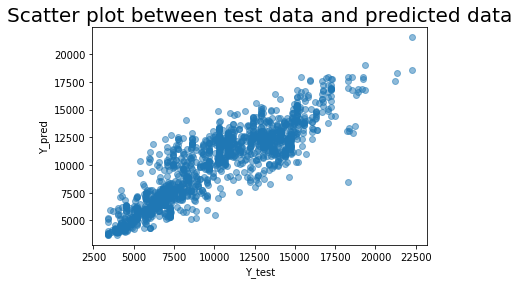

In [93]:
#Scatter plot between test data and prediction
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.title("Scatter plot between test data and predicted data",fontsize = 20)
plt.show()

In [94]:
# Saving the model
#Importing joblib
from sklearn.externals import joblib
joblib.dump(rf,"Flight_Fare_Prediction_rf.pkl")

['Flight_Fare_Prediction_rf.pkl']